In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

<Axes: xlabel='job_title_short'>

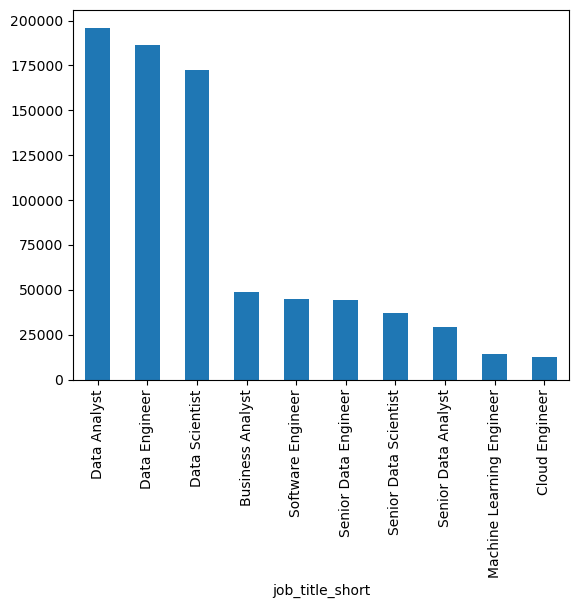

In [4]:
fig ,ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

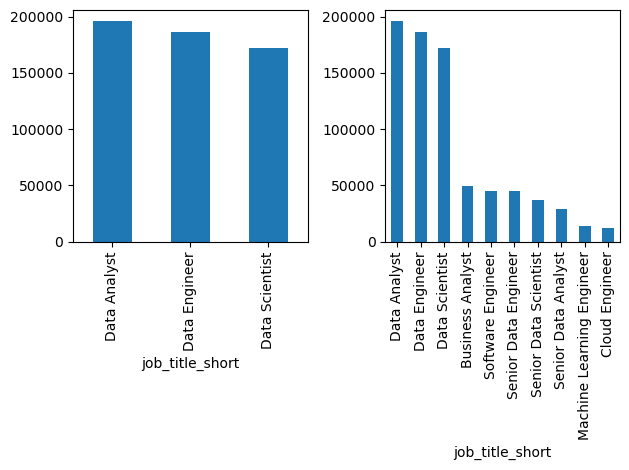

In [9]:
fig ,ax = plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_title_short'].value_counts().head(3).plot(kind='bar', ax=ax[0])
fig.tight_layout()


# Count of Top Skills by Job Postings - Data Analyst, Data Scientist, Data Engineer

In [11]:
df_skills = df.copy()
df_exploded = df.explode('job_skills')
skills_count = df_exploded.groupby(['job_skills','job_title']).size()
df_skills_count = skills_count.reset_index(name='skills_count')
df_skills_count = df_skills_count.sort_values('skills_count', ascending=False)

In [19]:
job_titles = ['Data Analyst','Data Scientist', 'Data Engineer']

In [17]:
df_skills_count

,job_skills,job_title,skills_count
954502,sql,Data Engineer,37009
647393,python,Data Engineer,34421
661363,python,Data Scientist,32335
944503,sql,Data Analyst,24036
968904,sql,Data Scientist,22236
...,...,...,...
454779,linux,Senior Data Analyst - 203QE,1
454780,linux,Senior Data Analyst - Power BI,1
454781,linux,Senior Data Analyst - Splunk,1
454782,linux,Senior Data Analyst Level 2,1


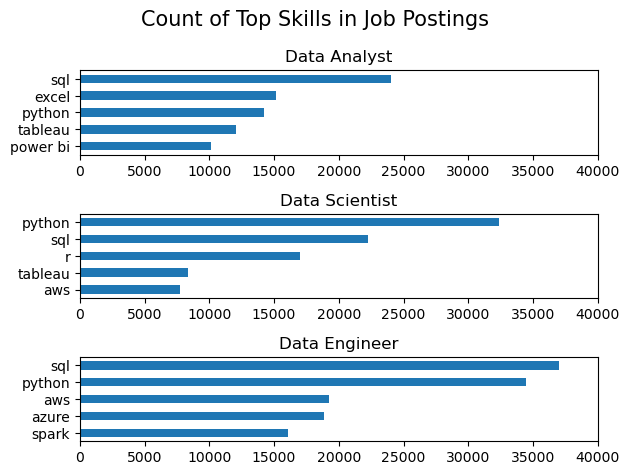

In [29]:
fig , ax = plt.subplots(3,1)
 
for i,job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title'] == job_title].head()
    df_plot.plot(kind='barh', x='job_skills', y='skills_count', ax= ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,40000)
fig.suptitle('Count of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()

# Pie Charts

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

Text(0, 0.5, '')

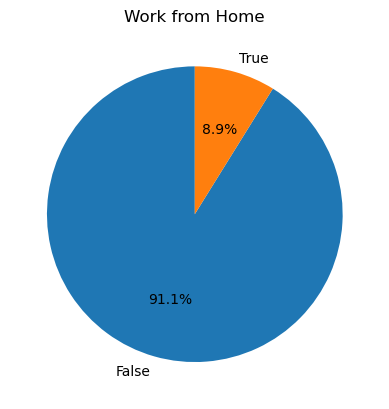

In [38]:
df['job_work_from_home'].value_counts().plot(kind="pie", startangle=90, autopct='%1.1f%%')
plt.title('Work from Home')
plt.ylabel("")

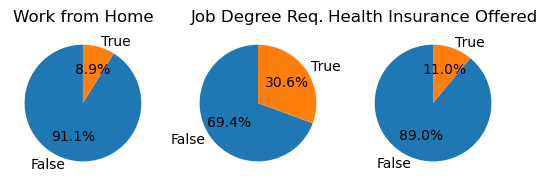

In [43]:
fig , ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home' :'Work from Home',
    'job_no_degree_mention' :'Job Degree Req.',
    'job_health_insurance' : 'Health Insurance Offered'
}

for i,(column, title)  in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels = ['False','True'])
    ax[i].set_title(title)

# Scatter Plot

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [57]:
df = df[df['job_title_short']=='Data Analyst']

In [58]:
df_exploded = df.explode('job_skills')

In [59]:
skills_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg', 'median')
)

skills_count = skills_stats.sort_values(by='skill_count', ascending=False).head(10)

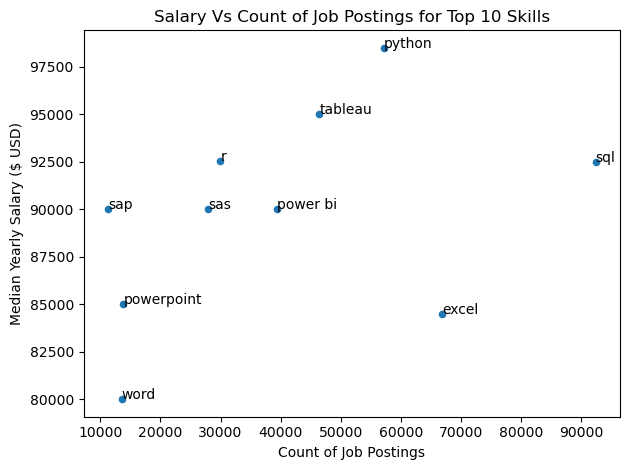

In [70]:
skills_count.plot(kind='scatter',x='skill_count', y='median_salary')
plt.title('Salary Vs Count of Job Postings for Top 10 Skills')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($ USD)')

for i , txt in enumerate(skills_count.index):
    plt.text(skills_count['skill_count'].iloc[i], skills_count['median_salary'].iloc[i], txt)

plt.tight_layout()

# Matplotlib Customization

## 1. Top 5 Skills Count by Month

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [73]:
df_DA['job_posted_month_number'] = df_DA['job_posted_date'].dt.month
df_DA_explode = df_DA.explode('job_skills')
df_DA_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_number
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3


In [74]:
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_number',columns='job_skills',aggfunc='size', fill_value=0)
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot

job_skills,job_posted_month_number,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
0,1,11336,8170,6606,5596,4285,3607,3830,1880,1778,...,2,0,0,1,0,0,0,1,0,0
1,2,7947,5772,4751,3936,3307,2576,2634,1291,1235,...,0,0,0,0,0,0,0,0,0,0
2,3,7868,5675,4741,4051,3176,2650,2554,1266,1203,...,0,1,0,0,0,0,1,0,0,0
3,4,7553,5496,4557,3776,3106,2399,2598,1190,1177,...,0,0,0,0,1,0,0,0,0,0
4,5,6617,4773,4070,3245,2695,2093,1940,979,957,...,0,0,0,0,0,0,0,0,0,1
5,6,7584,5724,4707,3812,3275,2442,2174,1173,1237,...,0,0,0,0,0,0,0,0,0,0
6,7,7687,5513,4831,3928,3350,2444,2118,1096,1069,...,0,0,1,0,0,0,0,0,0,0
7,8,8823,6482,5576,4533,3859,2975,2560,1332,1298,...,0,0,0,0,0,0,0,0,0,0
8,9,6829,4886,4229,3446,3118,2146,1880,944,945,...,0,0,0,0,0,0,0,0,0,0
9,10,7474,5217,4693,3709,3340,2380,2114,955,990,...,0,1,0,0,0,0,0,0,0,0


In [84]:
#df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_number'].apply(lambda x : pd.to_datetime(x, format='%m')).strftime(format='%b')
df_DA_pivot['job_posted_month'] = pd.to_datetime(df_DA_pivot['job_posted_month_number'], format='%m').dt.strftime('%b')
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_number')

In [85]:
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 0, '')

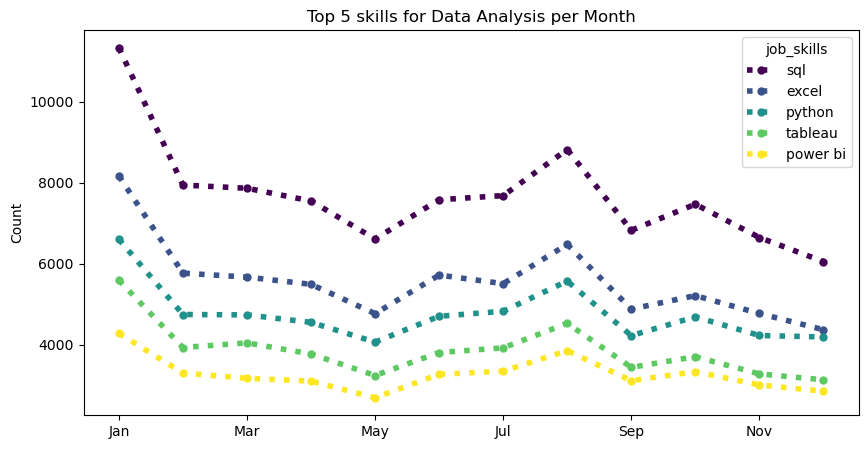

In [92]:
df_DA_pivot.iloc[:,:5].plot(
    kind='line',
    linewidth = 4,
    linestyle = ":",
    colormap='viridis',
    marker = 'o',
    markersize = 5,
    figsize=(10,5))
plt.title('Top 5 skills for Data Analysis per Month')
plt.ylabel('Count')
plt.xlabel('')

# 2. Salary Vs Count of Job Postings for Top 10 Skills - Customization

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [106]:
df = df[df['job_title_short']=='Data Analyst']

In [107]:
df_exploded = df.explode('job_skills')

In [108]:
skills_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg', 'median')
)

skills_count = skills_stats.sort_values(by='skill_count', ascending=False).head(20)

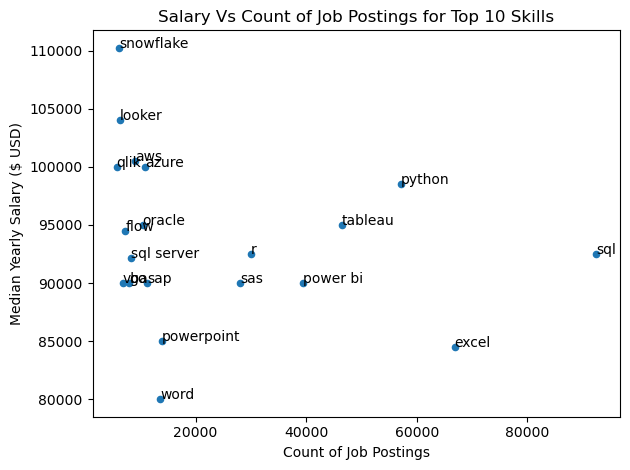

In [109]:
skills_count.plot(kind='scatter',x='skill_count', y='median_salary')
plt.title('Salary Vs Count of Job Postings for Top 10 Skills')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($ USD)')

for i , txt in enumerate(skills_count.index):
    plt.text(skills_count['skill_count'].iloc[i], skills_count['median_salary'].iloc[i], txt)

plt.tight_layout()

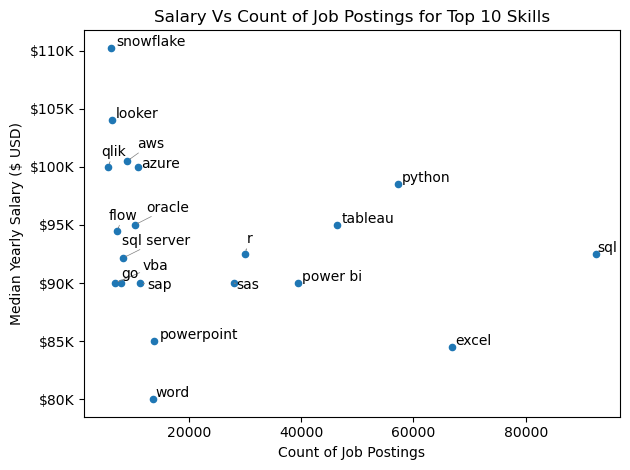

In [117]:
from adjustText import adjust_text 

skills_count.plot(kind='scatter',x='skill_count', y='median_salary')
plt.title('Salary Vs Count of Job Postings for Top 10 Skills')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($ USD)')

texts = []

for i , txt in enumerate(skills_count.index):
    texts.append(plt.text(skills_count['skill_count'].iloc[i], skills_count['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey', lw=0.5) )    
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.tight_layout()

# 3 . Histograms

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [121]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] =='Data Analyst')].copy()

Text(0, 0.5, 'Number of Jobs')

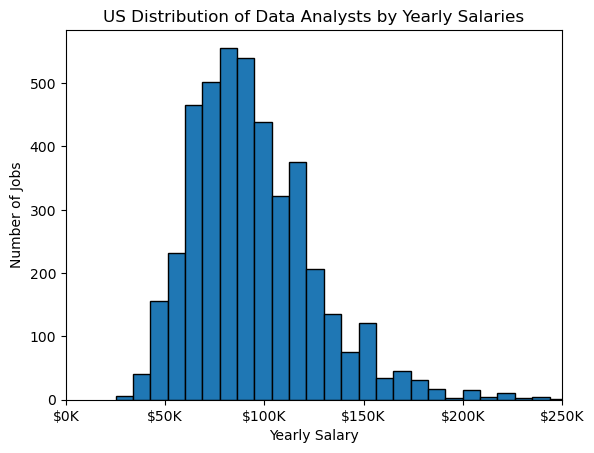

In [137]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins= 40, edgecolor='black')
plt.xlim(0,250000)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.title('US Distribution of Data Analysts by Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

# 4. Box Plots

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [141]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] =='Data Analyst')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [142]:
df_DA_US['salary_year_avg'].sample(10)

664472     77500.0
539917     50000.0
131653    125000.0
631270     70000.0
759533     70000.0
386355     97500.0
107129    128356.0
545918    126801.5
3237      120000.0
614864    115000.0
Name: salary_year_avg, dtype: float64

<Axes: >

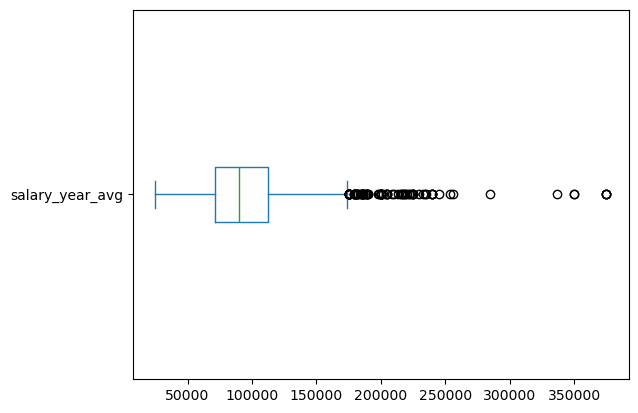

In [144]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

In [152]:
jobs_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']


df_US = df[(df['job_title_short'].isin(jobs_titles) ) & (df['job_country'] =='United States')].copy()


df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in jobs_titles]


Text(0, 0.5, 'Job Titles')

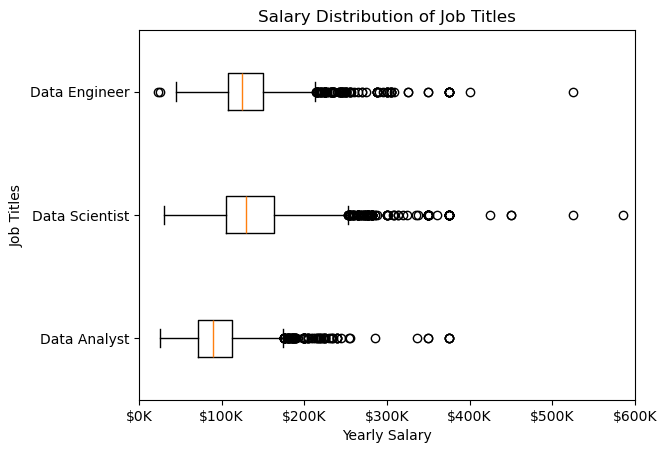

In [158]:
plt.boxplot(job_list, labels=jobs_titles , vert=False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
plt.title('Salary Distribution of Job Titles')
plt.xlim(0,600000)
plt.xlabel('Yearly Salary')
plt.ylabel('Job Titles')

## 5. Skills Pay Analysis

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [174]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] =='Data Analyst')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [175]:
df_DA_US = df_DA_US.explode('job_skills')

In [176]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_DA_US_top_pay = df_DA_US_group.sort_values(by = 'median', ascending=False).head(10)
df_DA_US_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [177]:
df_DA_US_top_skills = df_DA_US_group.sort_values(by = 'count', ascending=False).head(10).sort_values(by = 'median', ascending=False).head(10)
df_DA_US_top_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


(0.0, 206062.5)

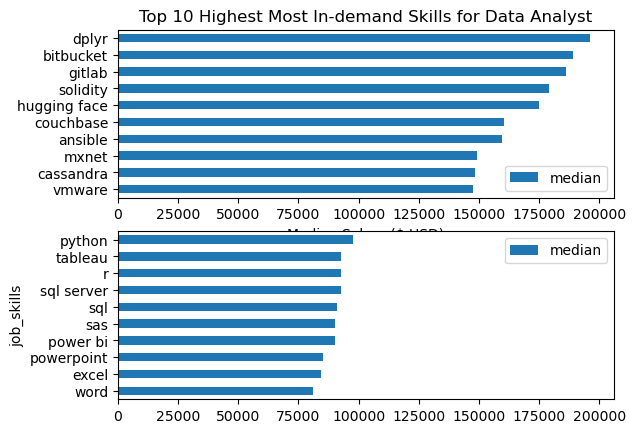

In [184]:
fig , ax = plt.subplots(2,1)

df_DA_US_top_pay.plot(kind='barh', y ='median', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
df_DA_US_top_skills.plot(kind='barh', y ='median', ax=ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_title('Top 10 Highest Most In-demand Skills for Data Analyst')
ax[1].set_xlabel('Median Salary ($ USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
fig.tight_layout()